In [1]:
%pip install ipympl
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

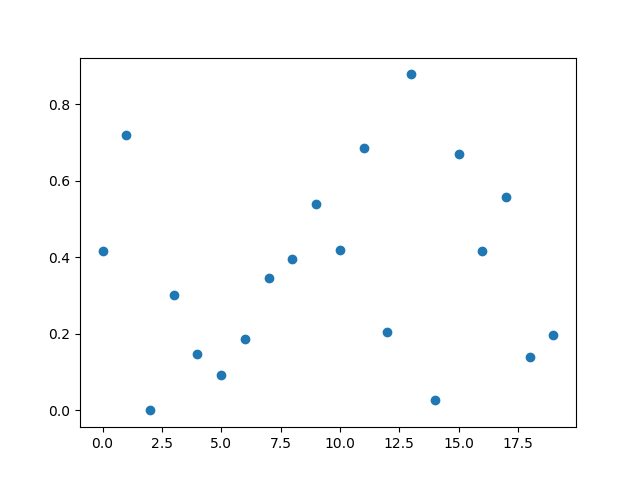

In [2]:
# initialize the data and plot it
POINTS = 20
np.random.seed(1)
x = np.arange(POINTS)
y = np.random.rand(POINTS)

plt.scatter(x, y)
plt.show()

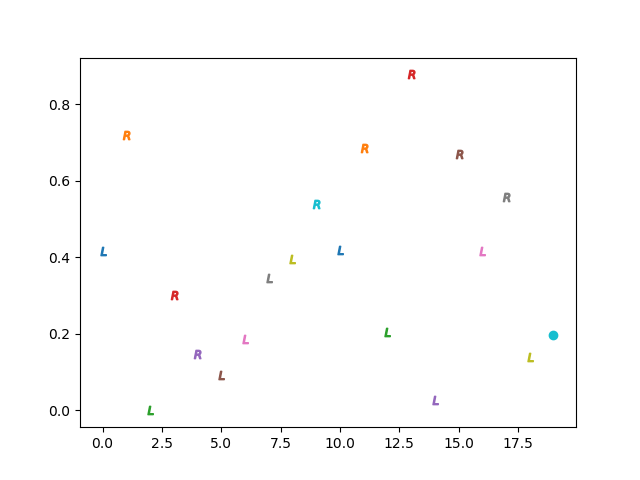

In [3]:
# Calculate turns using difference
turns = list(range(0, POINTS))
fig, ax = plt.subplots()
for i in range(0, POINTS - 1):
    if (y[i + 1] > y[i]):
        turns[i] = -1 # left
        ax.scatter(x[i], y[i], marker='$L$')
    elif (y[i + 1] < y[i]):
        turns[i] = 1 # Right
        ax.scatter(x[i], y[i], marker='$R$')
    else:
        turns[i] = 0
        ax.scatter(x[i], y[i], marker='o')
ax.scatter(x[-1], y[-1], marker='o')

In [15]:
# Number of turns
n_left = 0
n_right = 0
for i in turns:
    if (i == 1): n_right += 1
    elif (i == -1): n_left += 1
print(f'Left turns: {n_left}, Right turns: {n_right}')

Left turns: 11, Right turns: 8


0.20845381494261456
0.4179919208103183
0.500247844625161
1.0469758369415614
1.0483764038486953
0.8102983498606509
0.8654174262079648
0.5386491545556495
1.1933063960691408
0.08477108550759249
2.686732350889092
-0.9643101542154233
4.246153729732187
0.4278953543206847
1.9261792329406182
1.2681488283393736
4.777959370661341
4.619189706717311
[[(0, 0.417022004702574), (1, 0.7203244934421581), (2, 0.00011437481734488664)], [(1, 0.7203244934421581), (2, 0.00011437481734488664), (3, 0.30233257263183977)], [(2, 0.00011437481734488664), (3, 0.30233257263183977), (4, 0.14675589081711304)], [(3, 0.30233257263183977), (4, 0.14675589081711304), (5, 0.0923385947687978)], [(4, 0.14675589081711304), (5, 0.0923385947687978), (6, 0.1862602113776709)], [(5, 0.0923385947687978), (6, 0.1862602113776709), (7, 0.34556072704304774)], [(6, 0.1862602113776709), (7, 0.34556072704304774), (8, 0.39676747423066994)], [(7, 0.34556072704304774), (8, 0.39676747423066994), (9, 0.538816734003357)], [(8, 0.396767474230669

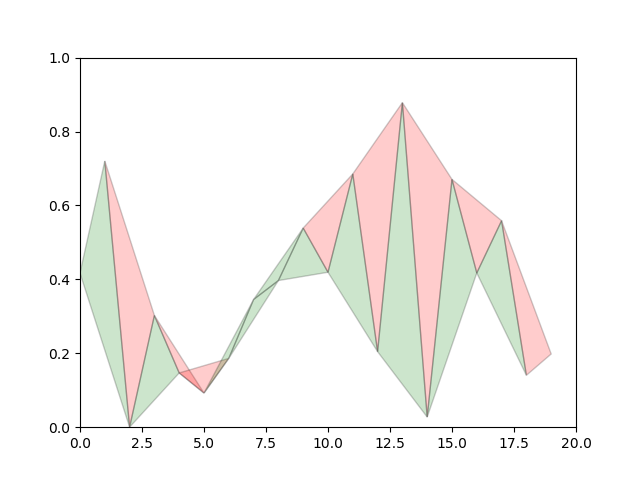

In [29]:
# Using triangle area
from matplotlib.patches import Polygon
triangles = []
turns1 = []
fig1, ax1 = plt.subplots()
for i in range(0, POINTS - 2):
    triangles.append([(x[i], y[i]),
                    (x[i + 1], y[i + 1]),
                    (x[i + 2], y[i + 2])])
ax1.set_xlim(0, 20)
ax1.set_ylim(0, 1)
for i in triangles:
    X = [i[0][0], i[1][0], i[2][0]]
    Y = [i[0][1], i[1][1], i[2][1]]
    area = 0.5*(X[0]*(y[1] - Y[2]) + X[1]*(Y[2] - Y[0]) + X[2]*(Y[0] - Y[2]))
    print(area)
    slope = (Y[1] - Y[0])/(X[1] - X[0])
    if slope > 0:
        turns1.append(-1)
    elif slope < 0:
        turns1.append(1)
    ax1.add_patch(Polygon(i, closed=True, edgecolor='black', facecolor='green' if slope > 0 else 'red', alpha=0.2))
print(triangles)

# Was unable to make use of area as the triangle is always in the positive quadrant, we would have to normalize the X[0] and Y[0] as Origin and then analyze the triangle
# But a much better alternative is to just use the slope of B and A.

In [32]:
n_left = 0
n_right = 0
for i in turns1:
    if (i == 1): n_right += 1
    elif (i == -1): n_left += 1
print(f'Left turns: {n_left}, Right turns: {n_right}')

# Displays one less turn because we cannot form triangle with just last two points...

Left turns: 10, Right turns: 8
